<a href="https://colab.research.google.com/github/chryslersolvalan/OBISIP/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
[0 0 1 ... 0 0 0]
[0 0 0 ... 0 0 1]
[0 0 1 ... 0 0 1]
Random Forest Classifier
confusion matrix: 
[[964   1]
 [ 25 125]]
Accuracy:  0.9766816143497757
Decision tree
confusion matrix: 
[[957   8]
 [ 21 129]]
Accuracy:  0.9739910313901345
Naive Bayes
confusion matrix: 
[[955  10]
 [ 10 140]]
Accuracy:  0.9820627802690582
Report for Random forest classification                precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Report for decis

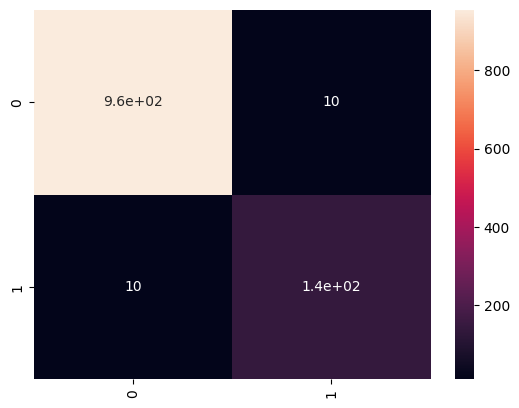

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re,string
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download('stopwords')
%matplotlib inline
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import RandomizedSearchCV


df=pd.read_csv("spam.csv",encoding='ISO-8859-1')
df

df.isnull().sum()

df.head()

df.tail()

df = df[['v1','v2']]
df.columns=['label','message']
df.head()

df.info()

df.groupby('label')

df.shape

df['label'].value_counts().plot(kind='bar')

ps=PorterStemmer()
corpus=[]
for i in range(0, len(df)):
  review = re.sub('[^a-zA-Z]',' ',df['message'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=4000)
x=cv.fit_transform(corpus).toarray()
y=pd.get_dummies(df['label'])
y=y.iloc[:,1].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)


m1 = RandomForestClassifier()
m1.fit(x_train, y_train)

m2=DecisionTreeClassifier()
m2.fit(x_train, y_train)

from sklearn.naive_bayes import MultinomialNB
m3=MultinomialNB()
m3.fit(x_train, y_train)

pr1=m1.predict(x_test)
pr2=m2.predict(x_test)
pr3=m3.predict(x_test)
print(pr1)
print(pr2)
print(pr3)

print("Random Forest Classifier")
print("confusion matrix: ")
print(confusion_matrix(y_test,pr1))
print("Accuracy: ",  accuracy_score(y_test,pr1))

print("Decision tree")
print("confusion matrix: ")
print(confusion_matrix(y_test,pr2))
print("Accuracy: ",  accuracy_score(y_test,pr2))

print("Naive Bayes")
print("confusion matrix: ")
print(confusion_matrix(y_test,pr3))
print("Accuracy: ",  accuracy_score(y_test,pr3))

cm = confusion_matrix(y_test, pr3)
sns.heatmap(cm, annot=True)

report1 = classification_report(y_test,pr1)
print("Report for Random forest classification ",report1)
report2 = classification_report(y_test,pr2)
print("Report for decision Tree",report2)
report3 = classification_report(y_test,pr3)
print("Report for Navies bayes",report3)